In [73]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Configuration options
feature_vector_length = 784
num_classes = 10

In [67]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

(60000, 28, 28)
(10000, 28, 28)


In [68]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')


d = feature_vector_length
d1 = 300
d2 = 200
d3 = 100
# Create the model
model = Sequential()
model.add(Dense(d1, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(d2, activation='sigmoid'))
model.add(Dense(d3, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

Feature shape: (784,)


In [69]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 2.3021 - accuracy: 0.1203 - val_loss: 2.2944 - val_accuracy: 0.1060
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 2.2895 - accuracy: 0.1339 - val_loss: 2.2858 - val_accuracy: 0.1870
Epoch 3/30
750/750 [==============================] - 3s 5ms/step - loss: 2.2806 - accuracy: 0.1504 - val_loss: 2.2750 - val_accuracy: 0.1891
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 2.2689 - accuracy: 0.1921 - val_loss: 2.2616 - val_accuracy: 0.1463
Epoch 5/30
750/750 [==============================] - 3s 5ms/step - loss: 2.2517 - accuracy: 0.2421 - val_loss: 2.2413 - val_accuracy: 0.3052
Epoch 6/30
750/750 [==============================] - 3s 5ms/step - loss: 2.2256 - accuracy: 0.3065 - val_loss: 2.2081 - val_accuracy: 0.3351
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 2.1815 - accuracy: 0.3661 - val_loss: 2.1473 - val_accuracy: 0.4178
Epoch 

In [70]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.4723 - accuracy: 0.8615
Test results - Loss: 0.47234857082366943 - Accuracy: 0.8615000247955322%


In [71]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


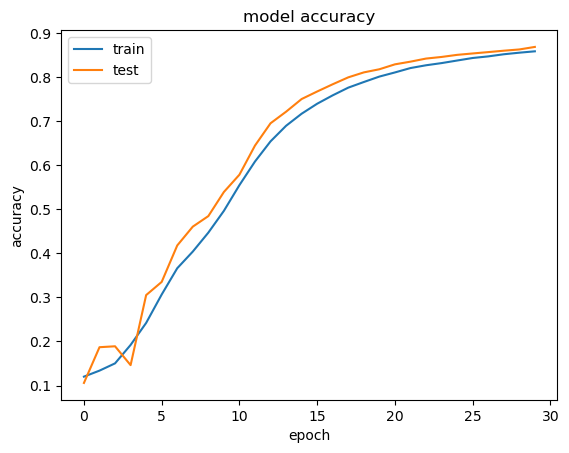

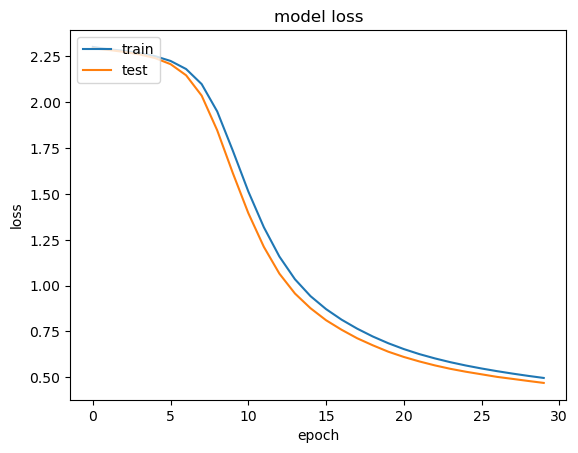

In [72]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
#model2 with different hyperparameters
# Create the model
uniform_init = initializers.RandomUniform(minval=-1., maxval=1.)
model2 = Sequential()
model2.add(Dense(d1, input_shape=input_shape, activation='sigmoid', kernel_initializer=uniform_init))
model2.add(Dense(d2, activation='sigmoid', kernel_initializer=uniform_init))
model2.add(Dense(d3, activation='sigmoid', kernel_initializer=uniform_init))
model2.add(Dense(num_classes, activation='softmax', kernel_initializer=uniform_init))
# Configure the model and start training
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, epochs=30, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/30


C:\Users\Jianwei\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


750/750 [==============================] - 4s 5ms/step - loss: 2.1112 - accuracy: 0.3242 - val_loss: 1.4698 - val_accuracy: 0.5108
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 1.2632 - accuracy: 0.5903 - val_loss: 1.0569 - val_accuracy: 0.6643
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.9847 - accuracy: 0.6859 - val_loss: 0.8656 - val_accuracy: 0.7271
Epoch 4/30
750/750 [==============================] - 3s 5ms/step - loss: 0.8361 - accuracy: 0.7368 - val_loss: 0.7520 - val_accuracy: 0.7624
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.7413 - accuracy: 0.7676 - val_loss: 0.6766 - val_accuracy: 0.7862
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.6741 - accuracy: 0.7889 - val_loss: 0.6229 - val_accuracy: 0.8019
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.6239 - accuracy: 0.8056 - val_loss: 0.5821 - val_accuracy: 0.8145
Epoch 8/30
750/75

In [85]:
# Test the model after training
test_results2 = model2.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results2[0]} - Accuracy: {test_results2[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.9027
Test results - Loss: 0.3199194669723511 - Accuracy: 0.9027000069618225%


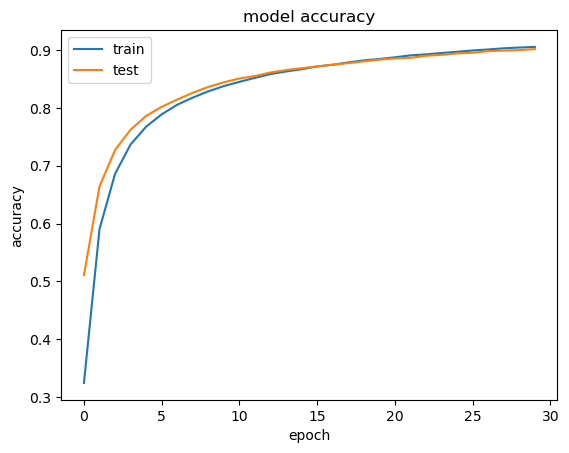

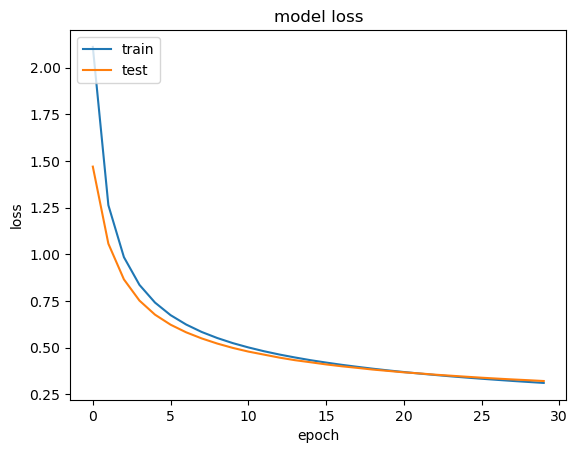

In [86]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()